In [1]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = paddle.vision.datasets.MNIST(mode='train')

Cache file /home/zhanglangeba/.cache/paddle/dataset/mnist/train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-images-idx3-ubyte.gz 
Begin to download


item 2421/2421 [============================>.] - ETA: 0s - 3ms/item


Download finished
Cache file /home/zhanglangeba/.cache/paddle/dataset/mnist/train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-labels-idx1-ubyte.gz 
Begin to download


item 8/8 [============================>.] - ETA: 0s - 17ms/item


Download finished


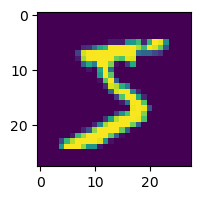

In [23]:
tmp_data=np.array(train_dataset[0][0])
tmp_label=np.array(train_dataset[0][1])
plt.figure(figsize=(2,2))
plt.imshow(tmp_data)
plt.show()

In [48]:
class Net(paddle.nn.Layer):
    def __init__(self):
        super(Net, self).__init__()
        
        # 定义一层全连接层，输出维度是1
        self.network = paddle.nn.Linear(in_features=784, out_features=1)
    def forward(self,x):
        return self.network(x)

In [49]:
def norm_img(img):
    assert len(img.shape)==3
    batch_size,img_h,img_w=img.shape[0],img.shape[1],img.shape[2]
    img=img/255
   
    img = paddle.reshape(img, [batch_size, img_h*img_w])
    
    return img

In [53]:
paddle.vision.set_image_backend('cv2')
model=Net()
def train(model):
    model.train()
    train_loader=paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'),batch_size=16,shuffle=True)
    opt=paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    epochs=10
    for epoch in range(epochs):
        for i,data in enumerate(train_loader):
            img_data=norm_img(data[0]).astype('float32')
            img_label=data[1].astype('float32')
            img_pred=model(img_data)
            avg_loss=paddle.mean(F.square_error_cost(img_pred,img_label))
            if i%1000==0:
                print("epoch:{},batch_id:{},loss :{}".format(epoch,i,avg_loss.numpy()))
            avg_loss.backward()
            opt.step()
            opt.clear_grad()
train(model)
paddle.save(model.state_dict(),'model/mnist.pdparams')

epoch:0,batch_id:0,loss :[23.436562]
epoch:0,batch_id:1000,loss :[3.3434043]
epoch:0,batch_id:2000,loss :[3.2530408]
epoch:0,batch_id:3000,loss :[5.427451]
epoch:1,batch_id:0,loss :[2.7779493]
epoch:1,batch_id:1000,loss :[4.2825127]
epoch:1,batch_id:2000,loss :[3.4024105]
epoch:1,batch_id:3000,loss :[5.4903626]
epoch:2,batch_id:0,loss :[2.7026155]
epoch:2,batch_id:1000,loss :[3.1143513]
epoch:2,batch_id:2000,loss :[3.3248713]
epoch:2,batch_id:3000,loss :[3.3470554]
epoch:3,batch_id:0,loss :[3.2950013]
epoch:3,batch_id:1000,loss :[4.1829886]
epoch:3,batch_id:2000,loss :[4.5915985]
epoch:3,batch_id:3000,loss :[2.1395457]
epoch:4,batch_id:0,loss :[2.965354]
epoch:4,batch_id:1000,loss :[2.3953462]
epoch:4,batch_id:2000,loss :[3.0509007]
epoch:4,batch_id:3000,loss :[4.755611]
epoch:5,batch_id:0,loss :[4.6378336]
epoch:5,batch_id:1000,loss :[4.3146124]
epoch:5,batch_id:2000,loss :[3.1119897]
epoch:5,batch_id:3000,loss :[2.5975313]
epoch:6,batch_id:0,loss :[4.6585064]
epoch:6,batch_id:1000,lo

In [51]:
print(1)

1
